In [49]:
import requests
import json
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

COUNTRY = "poland"
API_URL = f"https://api.covid19api.com/country/{COUNTRY}?from=2020-03-01T00:00:00Z&to=2021-12-01T00:00:00Z"
response = requests.get(API_URL)
raw = json.loads(response.content.decode("utf8"))
print(raw[0], raw[-1])

{'ID': '49358c6d-8c73-4867-bfb4-d01b62371877', 'Country': 'Poland', 'CountryCode': 'PL', 'Province': '', 'City': '', 'CityCode': '', 'Lat': '51.92', 'Lon': '19.15', 'Confirmed': 0, 'Deaths': 0, 'Recovered': 0, 'Active': 0, 'Date': '2020-03-01T00:00:00Z'} {'ID': '0a167ceb-05af-415b-8f3f-05d69565184e', 'Country': 'Poland', 'CountryCode': 'PL', 'Province': '', 'City': '', 'CityCode': '', 'Lat': '51.92', 'Lon': '19.15', 'Confirmed': 3569137, 'Deaths': 84153, 'Recovered': 0, 'Active': 3484984, 'Date': '2021-12-01T00:00:00Z'}


{'ID': '1bc3f1af-6a68-4e96-b1cf-c4d7cb4bc36f', 'Country': 'United Kingdom', 'CountryCode': 'GB', 'Province': 'Anguilla', 'City': '', 'CityCode': '', 'Lat': '18.22', 'Lon': '-63.07', 'Confirmed': 0, 'Deaths': 0, 'Recovered': 0, 'Active': 0, 'Date': '2020-03-01T00:00:00Z'} {'ID': 'f8b08018-1a73-4b1b-bfc1-84e9554ec284', 'Country': 'United Kingdom', 'CountryCode': 'GB', 'Province': 'Gibraltar', 'City': '', 'CityCode': '', 'Lat': '36.14', 'Lon': '-5.35', 'Confirmed': 7281, 'Deaths': 98, 'Recovered': 0, 'Active': 7183, 'Date': '2021-12-01T00:00:00Z'}


,CountryCode,Confirmed,Deaths,Active,Recovered,NewCases,Date
636,PL,3487254,82986,3404268,0,25809.0,2021-11-27 00:00:00+00:00
637,PL,3507828,83037,3424791,0,20523.0,2021-11-28 00:00:00+00:00
638,PL,3520961,83055,3437906,0,13115.0,2021-11-29 00:00:00+00:00
639,PL,3540061,83583,3456478,0,18572.0,2021-11-30 00:00:00+00:00
640,PL,3569137,84153,3484984,0,28506.0,2021-12-01 00:00:00+00:00


<Figure size 432x288 with 0 Axes>

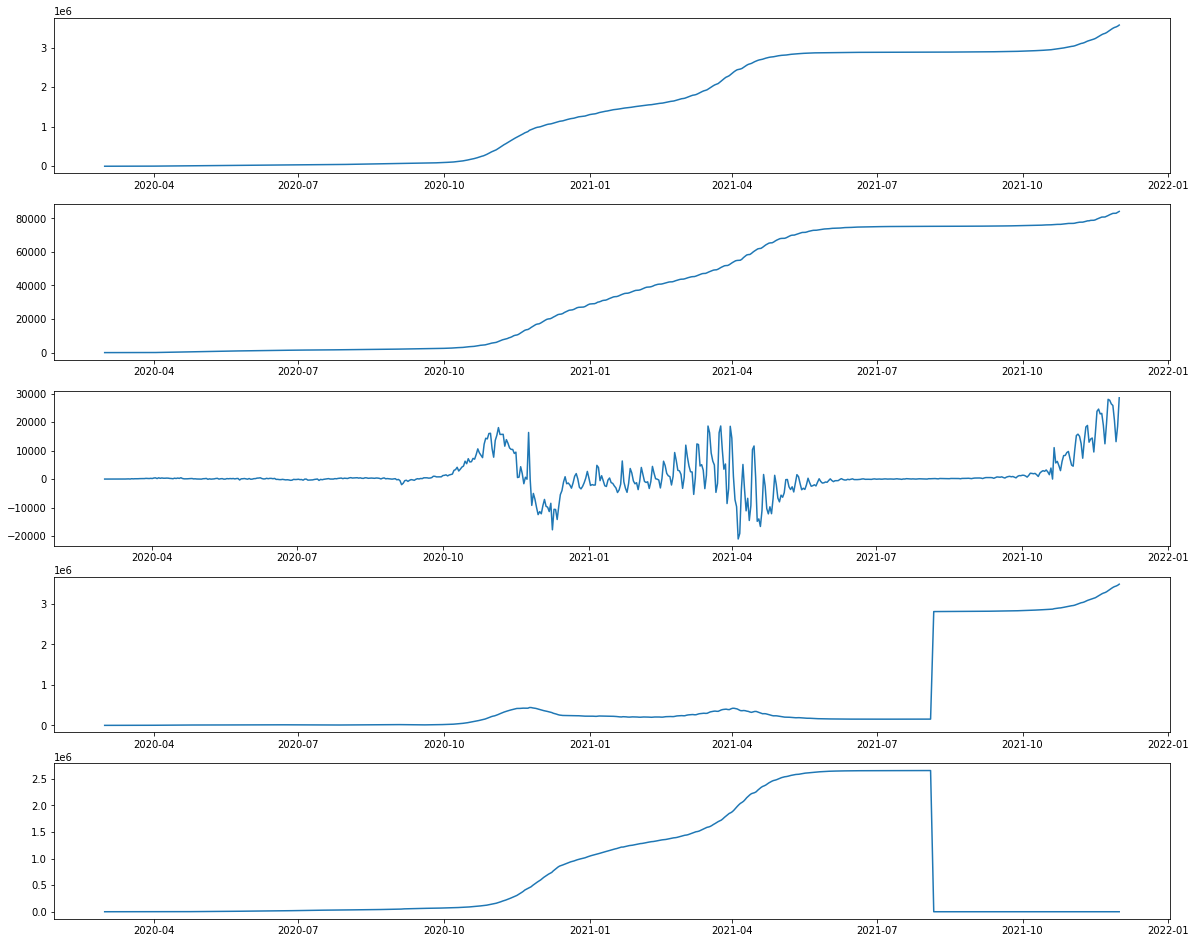

In [85]:
df = pd.DataFrame.from_records(raw)
# prune invalid data
df['NewCases'] = df['Active'].diff(1)
df['Date'] = pd.to_datetime(df['Date'])
df = df.drop(df[df['NewCases'] > 1e6].index)


display(df[['CountryCode', 'Confirmed', 'Deaths', 'Active', 'Recovered', 'NewCases', 'Date']][-5:])

fig = plt.figure(1)
plt.figure(figsize=(20,20))
plt.grid(True)

plt.subplot(611)
plt.plot(df['Date'], df['Confirmed'])

plt.subplot(612)
plt.plot(df['Date'], df['Deaths'])

plt.subplot(613)
plt.plot(df['Date'], df['NewCases'], label='NewCases')

plt.subplot(614)
plt.plot(df['Date'], df['Active'])

plt.subplot(615)
plt.plot(df['Date'], df['Recovered'])
# plt.xticks(rotation=90)
plt.show()

<Figure size 432x288 with 0 Axes>

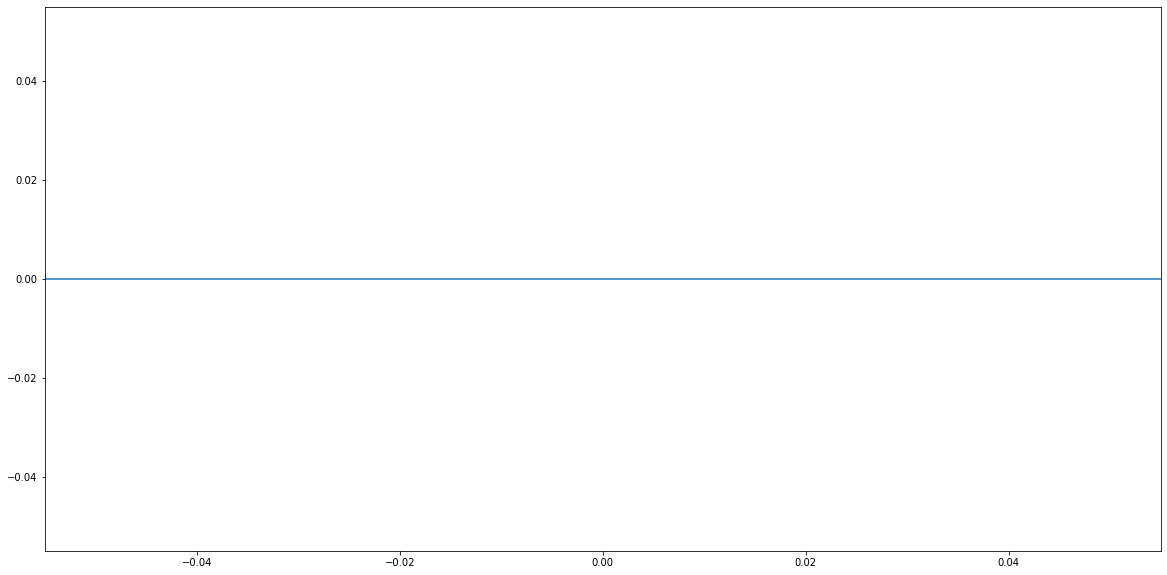

In [92]:
plt.figure(2)
plt.figure(figsize=(20,10))
plt.acorr(df['NewCases'])
plt.show()